In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge

In [210]:
%run functions.py

In [211]:
df_train_clean = pd.read_csv('../data/train_clean.csv')
df_test_clean = pd.read_csv('../data/test_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [212]:
features = df_train_clean.columns.drop('saleprice')

In [213]:
features = ['lot_area', 'condition_1', 'central_air',
            '1st_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
            'kitchen_qual', 'fireplaces', 'garage_cars',
            'garage_area', 'garage_cond', 'paved_drive', 'yr_sold',
            'age', 'quality', 'remod', 'bsmt_rating', 'bsmt_sf']

In [214]:
features = ['lot_area',
            '1st_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
            'kitchen_qual',
            'garage_area',
            'age', 'quality', 'remod', 'bsmt_rating', 'bsmt_sf']

In [215]:
features = df_train_clean.columns.drop(['saleprice', 'yr_sold', 'year_built'])
features

Index(['ms_zoning', 'lot_area', 'condition_1', 'overall_qual', 'overall_cond',
       'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond',
       'bsmt_unf_sf', 'total_bsmt_sf', 'central_air', '1st_flr_sf',
       'gr_liv_area', 'full_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'kitchen_qual', 'fireplaces', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'paved_drive', 'age', 'quality', 'remod',
       'bsmt_rating', 'bsmt_sf'],
      dtype='object')

## Natural Log Model

In [216]:
X = df_train_clean[features].copy()

In [217]:
y = df_train_clean['saleprice'].copy()
y = y.map(np.log)

In [218]:
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

Create a new linear regression model and fit it over the train data.  
Then, calculate the Train score, Test score, and Baseline score.

In [220]:
model_log = LinearRegression()
model_log.fit(X_train, y_train)
calc_scores(model_log, X_train, y_train, X_test, y_test)

Train score  0.9609719973854534
Test score   -0.12122368130990102
Baseline     -2551.771815150261


Predict the sale price for the test data.

In [221]:
y_pred_log = model_log.predict(X_test)
resids_log = y_test - y_pred_log

Reverse the predictions for test and predicted sale price from natural log to price units.

In [222]:
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test)
y_train = np.exp(y_train)

Calculate metrics for true values vs. predicted values of the sales price.

In [223]:
calc_metrics(y_test, y_pred)

RMSE 289203.8639679176
MSE  83638874933.9738
R2   -11.399976559610458
MAE  45785.639241457


#### For 1 unit increase (___) in gr_liv_area, holding all other variables constant, we can expect the average price of a home to increase by ___.

In [224]:
model_log.intercept_

14209.691456628185

In [225]:
coef = zip(X.columns, model_log.coef_)
df_coef = pd.DataFrame(coef, columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)
df_coef

,Feature,Coefficient
24,paved_drive,87.507001
9,bsmt_cond,81.727607
8,bsmt_qual,61.536109
23,garage_cond,47.253463
19,fireplaces,12.583910
18,kitchen_qual,9.681927
2,condition_1,8.936963
3,overall_qual,3.909466
4,overall_cond,1.065269
25,age,0.290236


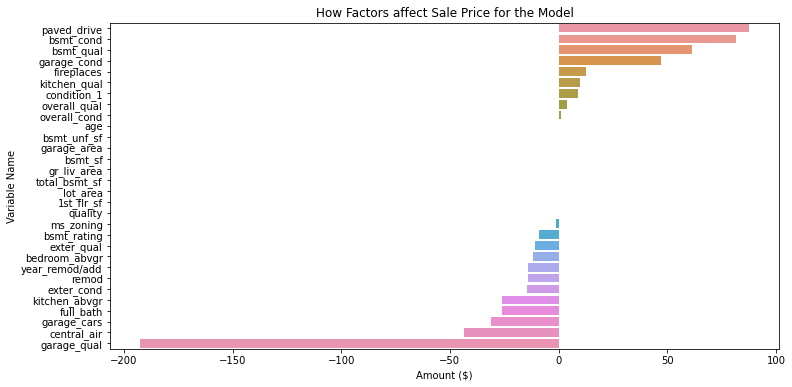

In [226]:
plt.figure(figsize=(12,6))
plt.title('How Factors affect Sale Price for the Model')
ax = sns.barplot(x='Coefficient', y='Feature', data=df_coef)
ax.set(xlabel='Amount ($)', ylabel='Variable Name');